# **1. Importing Modules**

In [73]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dropout, Dense
from tensorflow import lite

from sklearn.metrics import confusion_matrix, classification_report
import seaborn
from matplotlib import pyplot
from sklearn.model_selection import train_test_split

import numpy
import os
import pandas

# **2. Loading Dataset**

In [74]:
labels = ["thumbsup", "thumbsdown", "pointing", "victory", "fist", "palm", "ILoveU", "ok"]

In [75]:
X = []
Y = []

for num, label in enumerate(labels):
    labeldata = numpy.load(os.path.join("samples", label + ".npy"))

    X.extend(labeldata)
    Y.extend([num] * len(labeldata))

X = numpy.array(X)
Y = numpy.array(Y)

In [76]:
print("Total Samples:", len(X))

Total Samples: 40000


In [77]:
x_train, x_test, y_train, y_test = train_test_split(
    X, Y, train_size=0.95, random_state=42
)

# **3. Building Model**

In [78]:
model = Sequential(
    [
        Input(x_train[0].shape),
        Dropout(0.2),
        Dense(20, activation="relu"),
        Dropout(0.4),
        Dense(10, activation="relu"),
        Dense(len(labels), activation="softmax"),
    ]
)

In [79]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_6 (Dropout)             │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 8)              │            88 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,158 (4.52 KB)

 Trainable params: 1,158 (4.52 KB)

 Non-trainable params: 0 (0.00 B)

# **4. Creating Callbacks**

In [80]:
dirpath = f"./models/{'-'.join(labels)}"

In [81]:
CPCallback = ModelCheckpoint(
    os.path.join(dirpath, "model.keras"), verbose=1, save_weights_only=False
)
ESCallback = EarlyStopping(patience=56, verbose=1)

# **5. Compiling Model**

In [82]:
model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

# **6. Training Model**

In [83]:
history = model.fit(
    x_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(x_test, y_test),
    callbacks=[CPCallback, ESCallback],
)

Epoch 1/1000
275/297 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2057 - loss: 1.9461
Epoch 1: saving model to ./models/thumbsup-thumbsdown-pointing-victory-fist-palm-ILoveU-ok\model.keras
297/297 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2117 - loss: 1.9330 - val_accuracy: 0.6155 - val_loss: 1.3830
Epoch 2/1000
289/297 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4600 - loss: 1.3666
Epoch 2: saving model to ./models/thumbsup-thumbsdown-pointing-victory-fist-palm-ILoveU-ok\model.keras
297/297 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4611 - loss: 1.3638 - val_accuracy: 0.8465 - val_loss: 0.8422
Epoch 3/1000
278/297 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5667 - loss: 1.1001
Epoch 3: saving model to ./models/thumbsup-thumbsdown-pointing-victory-fist-palm-ILoveU-ok\model.keras
297/297 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5681 - loss: 1.0973 - val_accuracy: 0.9080 - val_loss: 0.6305
Epoch 4/1000
275/297 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6271 - l

In [84]:
with open(os.path.join(dirpath, "labels.txt"), "w") as file:
    file.write("\n".join(labels))

# **7. Plotting Loss And Accuracy**

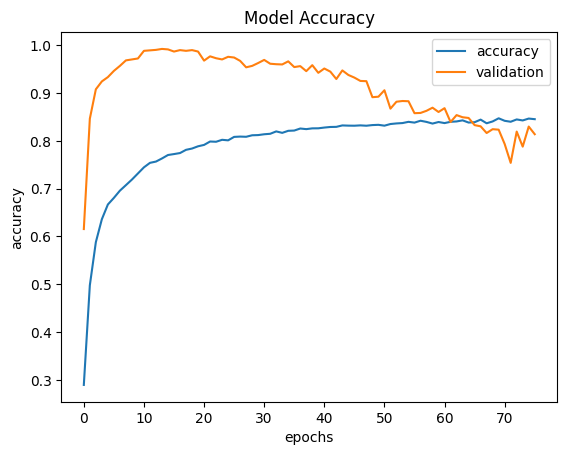

In [85]:
pyplot.title("Model Accuracy")

pyplot.plot(history.history["accuracy"])
pyplot.plot(history.history["val_accuracy"])

pyplot.legend(["accuracy", "validation"])

pyplot.xlabel("epochs")
pyplot.ylabel("accuracy")

pyplot.savefig(os.path.join(dirpath, "accuracy.png"), bbox_inches="tight")
pyplot.show()

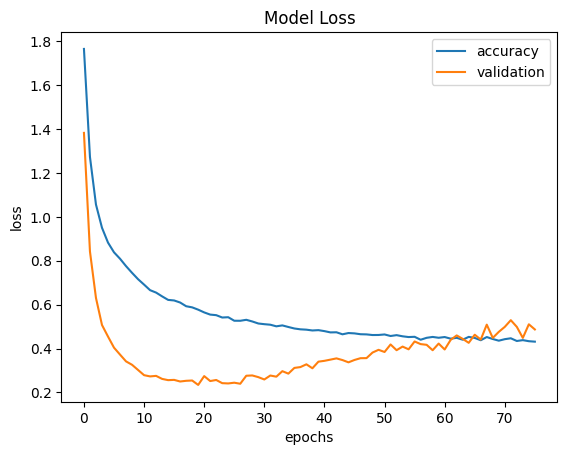

In [86]:
pyplot.title("Model Loss")

pyplot.plot(history.history["loss"])
pyplot.plot(history.history["val_loss"])

pyplot.legend(["accuracy", "validation"])

pyplot.xlabel("epochs")
pyplot.ylabel("loss")

pyplot.savefig(os.path.join(dirpath, "loss.png"), bbox_inches="tight")
pyplot.show()

# **8. Evaluation**

In [87]:
loss, accuracy = model.evaluate(x_test, y_test, batch_size=128)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8144 - loss: 0.4860


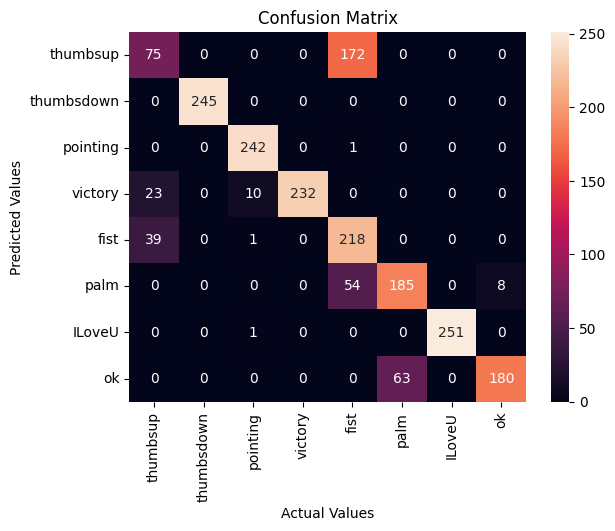

In [88]:
y_pred = numpy.argmax(model.predict(x_test, verbose=0), axis=1)

matrix = pandas.DataFrame(
    confusion_matrix(y_test, y_pred), index=labels, columns=labels
)

seaborn.heatmap(matrix, annot=True, fmt="g", square=False)

pyplot.title("Confusion Matrix")
pyplot.ylabel("Predicted Values")
pyplot.xlabel("Actual Values")

pyplot.savefig(os.path.join(dirpath, "confusion matrix.png"), bbox_inches="tight")
pyplot.show()

In [89]:
print("Classification Report: \n")
print(classification_report(y_test, y_pred, target_names=labels))

Classification Report: 

              precision    recall  f1-score   support

    thumbsup       0.55      0.30      0.39       247
  thumbsdown       1.00      1.00      1.00       245
    pointing       0.95      1.00      0.97       243
     victory       1.00      0.88      0.93       265
        fist       0.49      0.84      0.62       258
        palm       0.75      0.75      0.75       247
      ILoveU       1.00      1.00      1.00       252
          ok       0.96      0.74      0.84       243

    accuracy                           0.81      2000
   macro avg       0.84      0.81      0.81      2000
weighted avg       0.84      0.81      0.81      2000



# **9. Converting To TFLITE**

In [90]:
converter = lite.TFLiteConverter.from_keras_model(model)

converter.optimizations = [lite.Optimize.DEFAULT]
tflite_model = converter.convert()

with open(os.path.join(dirpath, "model.tflite"), "wb") as file:
    file.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\udham\AppData\Local\Temp\tmp6yw4pipk\assets


INFO:tensorflow:Assets written to: C:\Users\udham\AppData\Local\Temp\tmp6yw4pipk\assets


Saved artifact at 'C:\Users\udham\AppData\Local\Temp\tmp6yw4pipk'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='keras_tensor_18')
Output Type:
  TensorSpec(shape=(None, 8), dtype=tf.float32, name=None)
Captures:
  1993861420080: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1993980036016: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1993992183072: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1993992186416: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1993992183600: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1993980306256: TensorSpec(shape=(), dtype=tf.resource, name=None)


# **10. Inference**

In [91]:
interpreter = lite.Interpreter(model_path=os.path.join(dirpath, "model.tflite"))
interpreter.allocate_tensors()

In [92]:
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [93]:
num = numpy.random.randint(len(x_test))

In [94]:
interpreter.set_tensor(input_details[0]["index"], numpy.array([x_test[num]], "float32"))

In [95]:
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]["index"])

In [96]:
tflite_results = labels[numpy.argmax(tflite_results)]
reality = labels[y_test[num]]

print(f"Prediction: {tflite_results}\nReality: {reality}")

Prediction: palm
Reality: palm
